Spam Email Detection Using Machine Learning

Spam emails are unwanted or harmful messages sent in bulk, often containing scams, phishing links, or advertisements.
Automatically detecting spam is important to protect users from fraud and security risks.
In this project, we use Machine Learning to classify emails into:

Spam,
Ham (not spam)

We will perform:
Data cleaning
Text preprocessing
Feature extraction using TF-IDF
Model training with Naive Bayes
Evaluation
Real-time prediction

In [1]:
import pandas as pd # For data manipulation and numerical computations
import numpy as np

import matplotlib.pyplot as plt # For data visualization and plotting graphs
import seaborn as sns

import string # For text processing and cleaning
import re

from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("spam.csv", encoding="latin-1") # Load csv file
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# Remove unnamed columns
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

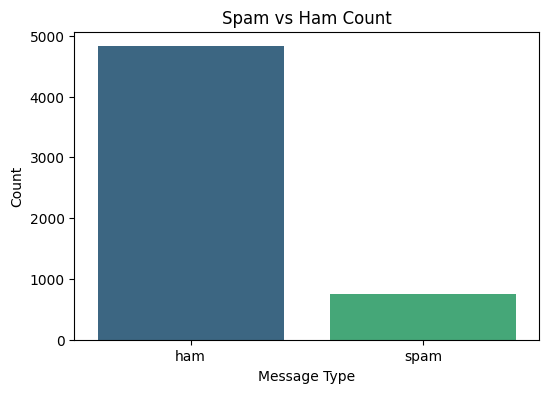

In [11]:
# Plot spam vs ham distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='label',hue='label', palette='viridis' ,legend=False)
plt.title("Spam vs Ham Count")
plt.xlabel("Message Type")
plt.ylabel("Count")
plt.show()

In [10]:
# Show a few sample spam messages
print("---- Example Spam Messages ----")
df[df['label']=='spam']['message'].head()

---- Example Spam Messages ----


2     Free entry in 2 a wkly comp to win FA Cup fina...
5     FreeMsg Hey there darling it's been 3 week's n...
8     WINNER!! As a valued network customer you have...
9     Had your mobile 11 months or more? U R entitle...
11    SIX chances to win CASH! From 100 to 20,000 po...
Name: message, dtype: object

In [9]:
# Show a few sample ham messages
print("---- Example Ham Messages ----")
df[df['label']=='ham']['message'].head()

---- Example Ham Messages ----


0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
6    Even my brother is not like to speak with me. ...
Name: message, dtype: object

In [7]:
df['message_length'] = df['message'].apply(len)
df[['message', 'message_length']].head()

,message,message_length
0,"Go until jurong point, crazy.. Available only ...",111
1,Ok lar... Joking wif u oni...,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,U dun say so early hor... U c already then say...,49
4,"Nah I don't think he goes to usf, he lives aro...",61


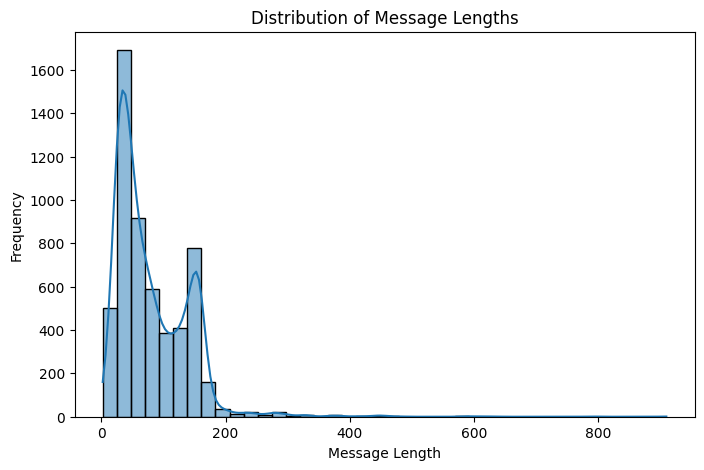

In [8]:
# Plot distribution of message lengths
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='message_length', bins=40, kde=True)
plt.title("Distribution of Message Lengths")
plt.xlabel("Message Length")
plt.ylabel("Frequency")
plt.show()

In [14]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer # lemmatization

# Initialize Lemmatizer
lemmatizer = WordNetLemmatizer() 
stopwords_set = set(stopwords.words('english'))

def preprocess_text_improved(text):
    """
    Improved Preprocessing: Includes Lemmatization for better feature consolidation.
    """
    # 1. Lowercase
    text = text.lower()
    
    # 2. Remove non-alphabetic characters (allowing spaces)
    text = re.sub(r'[^a-zA-Z\s]', '', text) 

    # 3. Tokenize
    words = text.split()

    # 4. Remove stopwords AND Apply Lemmatization
    words = [
        lemmatizer.lemmatize(word) 
        for word in words 
        if word not in stopwords_set and len(word) > 1
    ]

    # 5. Join words back
    cleaned_text = " ".join(words)

    return cleaned_text

In [15]:
import nltk
# Download required NLTK datasets
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Meghana
[nltk_data]     Kanigolla\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
df['clean_text_new'] = df['message'].apply(preprocess_text_improved)
df[['message', 'clean_text_new']].head()

,message,clean_text_new
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis great wo...
1,Ok lar... Joking wif u oni...,ok lar joking wif oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,U dun say so early hor... U c already then say...,dun say early hor already say
4,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate the vectorizer with N-grams
vectorizer = TfidfVectorizer(
    ngram_range=(1, 2), # Includes unigrams (single words) and bigrams (word pairs)
    max_features=5000   # Good practice to limit features to the top 5000
)

X = vectorizer.fit_transform(df['clean_text_new']) # Re-run fit_transform
print("TF-IDF Shape:", X.shape)   # (rows, features)

TF-IDF Shape: (5572, 5000)


vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_text'])
print("TF-IDF Shape:", X.shape)   # (rows, features)

In [18]:
y = df['label']   # target variable spam/ham

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)

Training samples: (4457, 5000)
Testing samples: (1115, 5000)


In [19]:
# Initialize and train Multinomial Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


Accuracy: 0.9748878923766816

Classification Report:

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       1.00      0.81      0.90       150

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



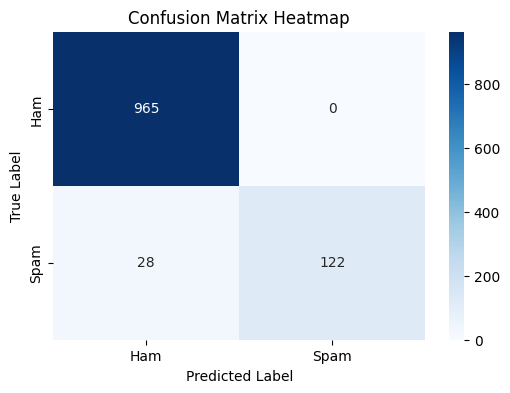

In [20]:
y_pred = model.predict(X_test) # Predict on test data

accuracy = accuracy_score(y_test, y_pred) # Evaluate accuracy
print("Accuracy:", accuracy)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Ham", "Spam"],
            yticklabels=["Ham", "Spam"])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()


In [21]:
def predict_message_improved(text):
    clean = preprocess_text_improved(text) # Use the improved function
    vec = vectorizer.transform([clean])
    pred = model.predict(vec)[0]
    return pred

# This should now correctly predict 'spam'
predict_message_improved("Congratulations! You have been selected to receive a $5000 gift voucher. Reply NOW to claim!")

np.str_('spam')